# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models  
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from sklearn.utils import shuffle

In [31]:
Data = pd.read_csv("ionosphere_data.csv")
Data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [32]:
Data.shape

(351, 35)

In [33]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

In [34]:
Data.corr

<bound method DataFrame.corr of      feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0           1         0   0.99539  -0.05889   0.85243   0.02306   0.83398   
1           1         0   1.00000  -0.18829   0.93035  -0.36156  -0.10868   
2           1         0   1.00000  -0.03365   1.00000   0.00485   1.00000   
3           1         0   1.00000  -0.45161   1.00000   1.00000   0.71216   
4           1         0   1.00000  -0.02401   0.94140   0.06531   0.92106   
..        ...       ...       ...       ...       ...       ...       ...   
346         1         0   0.83508   0.08298   0.73739  -0.14706   0.84349   
347         1         0   0.95113   0.00419   0.95183  -0.02723   0.93438   
348         1         0   0.94701  -0.00034   0.93207  -0.03227   0.95177   
349         1         0   0.90608  -0.01657   0.98122  -0.01989   0.95691   
350         1         0   0.84710   0.13533   0.73638  -0.06151   0.87873   

     feature8  feature9  feature10  ...  fe

In [35]:
Data.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
Data.drop(columns="label",inplace=True)
Data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [37]:
X_Train = Data[:200]
Y_Train = Data[:200]
Y_Train

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,0,0.93669,-0.00190,0.60761,0.43204,0.92314,-0.40129,0.93123,0.16828,...,0.84547,-0.02589,0.87293,-0.02302,0.98544,0.09385,0.78317,-0.10194,0.85841,-0.14725
196,1,0,1.00000,-1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,-0.50000,...,1.00000,1.00000,1.00000,0.62500,1.00000,-0.75000,-0.75000,1.00000,1.00000,1.00000
197,1,0,1.00000,0.23058,1.00000,-0.78509,1.00000,-0.10401,1.00000,0.15414,...,1.00000,-0.01253,0.96238,-0.04597,0.91165,0.03885,1.00000,-0.13722,0.96523,-0.11717
198,1,0,0.36876,-1.00000,-1.00000,-1.00000,-0.07661,1.00000,1.00000,0.95041,...,0.03021,0.06639,0.03443,-0.01186,-0.00403,-0.01672,-0.00761,0.00108,0.00015,0.00325


In [38]:
X_Test = Data[200:300]
Y_Test = Data[200:300]
Y_Test

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
200,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,1.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,-1.00000,0.00000,0.00000
201,1,0,1.00000,-0.28428,1.00000,-0.25346,0.94623,-0.35094,1.00000,-0.30566,...,0.49214,-0.73333,0.35504,-0.76054,0.26352,-0.78239,0.16604,-0.73145,0.13994,-0.70000
202,1,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.85000,-1.00000,...,1.00000,1.00000,-1.00000,-0.20000,1.00000,-1.00000,0.00000,1.00000,0.00000,0.00000
203,1,0,1.00000,0.09091,0.95455,-0.09091,0.77273,0.00000,1.00000,0.00000,...,0.90909,0.04545,0.91541,0.02897,0.95455,0.09091,0.86364,-0.09091,0.86364,0.04545
204,0,0,0.00000,0.00000,-1.00000,1.00000,1.00000,1.00000,-1.00000,-1.00000,...,1.00000,-1.00000,-1.00000,-1.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,0,0.46785,0.11308,0.58980,0.00665,0.55432,0.06874,0.47894,-0.13969,...,0.41463,-0.20177,0.53930,-0.11455,0.59867,-0.02882,0.53659,-0.11752,0.56319,-0.04435
296,1,0,0.88116,0.27475,0.72125,0.42881,0.61559,0.63662,0.38825,0.90502,...,-0.78334,-0.26356,-0.67557,-0.45511,-0.54732,-0.60858,-0.30512,-0.66700,-0.19312,-0.75597
297,1,0,0.93147,0.29282,0.79917,0.55756,0.59952,0.71596,0.26203,0.92651,...,-0.83192,-0.46906,-0.65165,-0.69556,-0.41223,-0.85725,-0.13590,-0.93953,0.10007,-0.94823
298,1,0,0.88241,0.30634,0.73232,0.57816,0.34109,0.58527,0.05717,1.00000,...,-0.57242,-0.67605,-0.31610,-0.81876,-0.02979,-0.86841,0.25392,-0.82127,0.00194,-0.81686


In [39]:
X_Val = Data[300:]
Y_Val = Data[300:]
Y_Val

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
300,1,0,0.92870,0.33164,0.76168,0.62349,0.49305,0.84266,0.21592,0.95193,...,-0.50757,-0.74735,-0.22323,-0.86122,0.07810,-0.87159,0.36021,-0.78057,0.59407,-0.60270
301,1,0,0.83367,0.31456,0.65541,0.57671,0.34962,0.70677,0.17293,0.78947,...,-0.26577,-0.66014,-0.01530,-0.69706,0.22708,-0.64428,0.43100,-0.51206,0.64662,-0.30075
302,1,0,0.98455,-0.02736,0.98058,-0.04104,1.00000,-0.07635,0.98720,0.01456,...,0.97352,-0.08341,0.96653,-0.12912,0.93469,-0.14916,0.97132,-0.15755,0.96778,-0.18800
303,1,0,0.94052,-0.01531,0.94170,0.01001,0.94994,-0.01472,0.95878,-0.01060,...,0.92049,-0.04476,0.92695,-0.05827,0.90342,-0.07479,0.91991,-0.07244,0.92049,-0.07420
304,1,0,0.97032,-0.14384,0.91324,-0.00228,0.96575,-0.17123,0.98630,0.18265,...,0.92466,0.06849,0.94043,-0.09252,0.97032,-0.20091,0.85388,-0.08676,0.96575,-0.21918
305,1,0,0.52542,-0.03390,0.94915,0.08475,0.52542,-0.16949,0.30508,-0.01695,...,0.40678,0.15254,0.67287,-0.00266,0.66102,-0.03390,0.83051,-0.15254,0.76271,-0.10169
306,1,0,0.33333,-0.25000,0.44444,0.22222,0.38889,0.16667,0.41667,0.13889,...,0.38889,0.08333,0.41543,-0.14256,0.19444,-0.13889,0.36924,-0.14809,0.08333,-0.50000
307,1,0,0.51207,1.00000,1.00000,0.53810,0.71178,0.80833,0.45622,0.46427,...,-1.00000,0.35175,-1.00000,0.09569,-1.00000,-0.16713,-1.00000,-0.42226,-0.91903,-0.65557
308,1,0,0.75564,0.49638,0.83550,0.54301,0.54916,0.72063,0.35225,0.70792,...,-0.98988,-0.29099,-0.70352,-0.32792,-0.63312,-0.19185,-0.34131,-0.60454,-0.19609,-0.62956
309,1,0,0.83789,0.42904,0.72113,0.58385,0.45625,0.78115,0.16470,0.82732,...,-0.37298,-0.67796,-0.05054,-0.62691,0.14690,-0.45911,0.37093,-0.39167,0.48319,-0.24313


In [40]:
mean=X_Train.iloc[:,:14].mean(axis=0)
X_Train.iloc[:,:14]=X_Train.iloc[:,:14]-mean
std=X_Train.iloc[:,:14].std(axis=0)
X_Train.iloc[: , 0:14] = X_Train.iloc[: , 0:14]/std
X_Train

D:\ja\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
D:\ja\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
D:\ja\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
0,0.36835,NaN,0.690529,-0.144119,0.516010,-0.082002,0.568909,-0.721513,0.883321,-0.133079,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,0.36835,NaN,0.698641,-0.402854,0.648325,-0.838511,-1.164578,-1.757128,0.883321,-0.301986,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,0.36835,NaN,0.698641,-0.093652,0.766596,-0.117819,0.874209,-0.246296,0.669715,-0.185160,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,0.36835,NaN,0.698641,-0.929360,0.766596,1.839540,0.344890,-1.875775,-1.052395,-0.209513,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,0.36835,NaN,0.698641,-0.074377,0.667088,0.001100,0.729043,-0.453701,0.441049,-0.542877,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.36835,NaN,0.587237,-0.030168,0.100287,0.722420,0.732868,-0.766374,0.750202,0.132571,...,0.84547,-0.02589,0.87293,-0.02302,0.98544,0.09385,0.78317,-0.10194,0.85841,-0.14725
196,0.36835,NaN,0.698641,-2.025862,0.766596,1.839540,0.874209,1.830197,0.883321,-1.225927,...,1.00000,1.00000,1.00000,0.62500,1.00000,-0.75000,-0.75000,1.00000,1.00000,1.00000
197,0.36835,NaN,0.698641,0.434674,0.766596,-1.671551,0.874209,-0.215518,0.883321,0.103827,...,1.00000,-0.01253,0.96238,-0.04597,0.91165,0.03885,1.00000,-0.13722,0.96523,-0.11717
198,0.36835,NaN,-0.412123,-2.025862,-2.629562,-2.094258,-1.105603,1.830197,0.883321,1.722507,...,0.03021,0.06639,0.03443,-0.01186,-0.00403,-0.01672,-0.00761,0.00108,0.00015,0.00325


In [41]:
val_mean = X_Val.iloc[:, 0:14].mean(axis=0)
val_std = X_Val.iloc[:, 0:14].std(axis=0)
X_Val.iloc[:, 0:14] -= val_mean
X_Val.iloc[:, 0:14] /= val_std

D:\ja\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
D:\ja\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
D:\ja\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from

In [42]:
test_mean = X_Test.iloc[:, 0:14].mean(axis=0)
test_std =  X_Test.iloc[:, 0:14].std(axis=0)
X_Test.iloc[:, 0:14] -= test_mean
X_Test.iloc[:, 0:14] /= test_std
X_Test

D:\ja\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
200,-2.466055,NaN,-1.451474,-0.136069,-1.334707,-0.407311,-1.214920,-0.483323,-0.876144,-0.585997,...,1.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,-1.00000,0.00000,0.00000
201,0.401451,NaN,0.862975,-0.891116,0.836715,-1.024455,0.873262,-1.211750,1.098134,-1.245451,...,0.49214,-0.73333,0.35504,-0.76054,0.26352,-0.78239,0.16604,-0.73145,0.13994,-0.70000
202,0.401451,NaN,-1.451474,-0.136069,-1.334707,-0.407311,-1.214920,-0.483323,-2.554280,-2.743471,...,1.00000,1.00000,-1.00000,-0.20000,1.00000,-1.00000,0.00000,1.00000,0.00000,0.00000
203,0.401451,NaN,0.862975,0.105388,0.738024,-0.628666,0.490375,-0.483323,1.098134,-0.585997,...,0.90909,0.04545,0.91541,0.02897,0.95455,0.09091,0.86364,-0.09091,0.86364,0.04545
204,-2.466055,NaN,-1.451474,-0.136069,-3.506129,2.027564,0.991924,1.592325,-2.850421,-2.743471,...,1.00000,-1.00000,-1.00000,-1.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.401451,NaN,-0.368659,0.164271,-0.054003,-0.391119,0.008378,-0.340643,0.069417,-0.887375,...,0.41463,-0.20177,0.53930,-0.11455,0.59867,-0.02882,0.53659,-0.11752,0.56319,-0.04435
296,0.401451,NaN,0.587926,0.593666,0.231431,0.636788,0.143591,0.838076,-0.109630,1.366559,...,-0.78334,-0.26356,-0.67557,-0.45511,-0.54732,-0.60858,-0.30512,-0.66700,-0.19312,-0.75597
297,0.401451,NaN,0.704365,0.641660,0.400628,0.950278,0.108127,1.002758,-0.358824,1.412923,...,-0.83192,-0.46906,-0.65165,-0.69556,-0.41223,-0.85725,-0.13590,-0.93953,0.10007,-0.94823
298,0.401451,NaN,0.590819,0.677569,0.255468,1.000436,-0.462187,0.731492,-0.763274,1.571476,...,-0.57242,-0.67605,-0.31610,-0.81876,-0.02979,-0.86841,0.25392,-0.82127,0.00194,-0.81686


In [43]:
X_Train.shape

(200, 34)

In [44]:
X_Test.shape

(100, 34)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [46]:
network = models.Sequential()
network.add(layers.Dense(10,activation = 'relu',input_shape=(X_Train.shape[1],)))
network.add(layers.Dense(8,activation = 'relu'))
network.add(layers.Dense(6,activation = 'relu'))

In [47]:
network.compile(optimizer = 'rmsprop', loss = "mse" , metrics = ['mae'])                                                                

In [48]:
network.fit(X_Train , Y_Train , epochs = 100, validation_data = (X_Val , Y_Val))

ValueError: A target array with shape (200, 34) was passed for an output of shape (None, 6) while using as loss `mean_squared_error`. This loss expects targets to have the same shape as the output.

In [49]:
network.add(layers.Dense(16, activation='relu', kernel_regularizer =regularizers.l2(0.02),   input_shape=(X_Train.shape[1],)))
network.add(layers.Dense(14, activation='relu', kernel_regularizer =regularizers.l2(0.02)))
network.add(layers.Dense(8, activation='relu', kernel_regularizer =regularizers.l2(0.02)))
network.add(layers.Dense(6, activation='relu', kernel_regularizer =regularizers.l2(0.002)))
network.add(layers.Dense(1))

In [50]:
network.compile(optimizer='adam', loss='mse', metrics=['mae'])
network.fit(X_Train,Y_Train, batch_size=16, epochs=200, validation_data=(X_Val, Y_Val))

ValueError: A target array with shape (200, 34) was passed for an output of shape (None, 1) while using as loss `mean_squared_error`. This loss expects targets to have the same shape as the output.

No handles with labels found to put in legend.


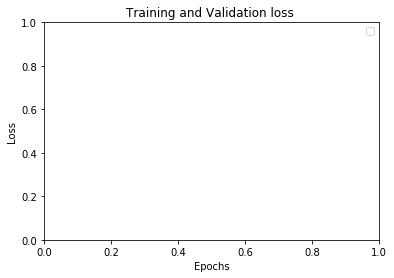

In [51]:
plt.title('Training and Validation loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [52]:
a=network.predict(X_Test)
print(a[0])
np.array(Y_Test)[0]

[nan]


array([ 0.       ,  0.       , -0.627136 , -0.0512308, -0.6146697,
       -0.1672822, -0.5505237, -0.2328539, -0.4437793, -0.2716128,
       -0.4368467, -0.1823966,  0.5918715,  0.8902184,  1.       ,
        1.       ,  1.       , -1.       ,  0.       ,  0.       ,
        1.       ,  1.       ,  1.       , -1.       ,  1.       ,
        1.       ,  1.       ,  0.       ,  1.       ,  1.       ,
        1.       , -1.       ,  0.       ,  0.       ])